In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv(r"C:\Users\91936\Desktop\wine and healthcare\Red Wine\winequality-red.csv")
df.drop_duplicates(inplace = True)
df = df.reset_index(drop = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


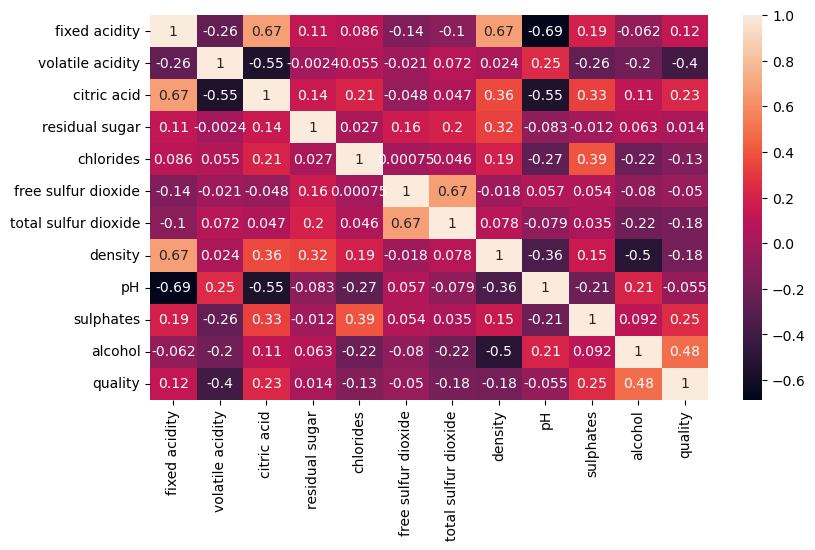

In [5]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

It seems it is safe to drop "residual sugar" , "free sulfur dioxide" and "pH"

In [6]:
df = df.drop(['residual sugar', 'free sulfur dioxide' , 'pH'], axis = 1)

In [7]:
for j in df.columns:
    if(j == 'quality'):
        continue
    Q1 = np.quantile(df[j],0.25)
    Q3 = np.quantile(df[j] ,0.75)
    IQR = Q3-Q1
    for i in df.index:
        if(df.loc[i,j] > (Q3 + (1.5*IQR)) or df.loc[i,j] < (Q1 - (1.5*IQR))):
            df.drop(i,axis = 0 , inplace = True)
df.shape 

(1108, 9)

In [8]:
df["quality"].value_counts()

quality
5    470
6    446
7    137
4     40
8     12
3      3
Name: count, dtype: int64

Removing outliers

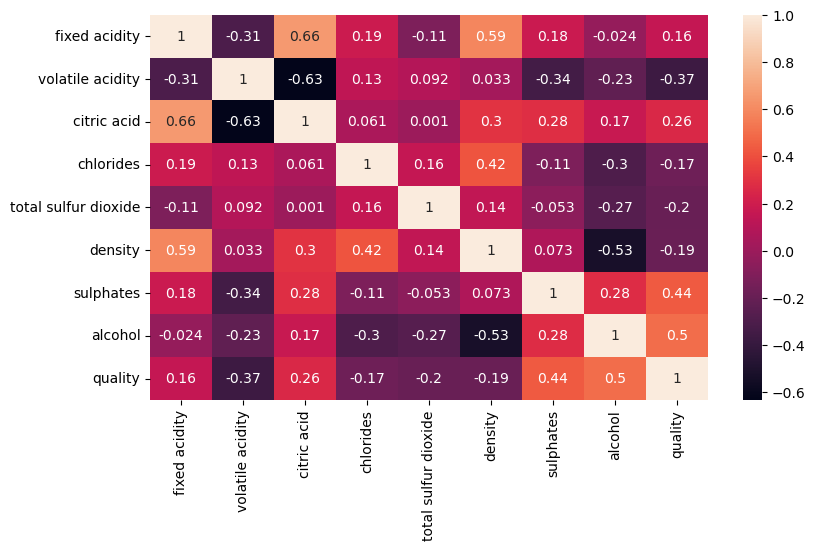

In [9]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

<Axes: xlabel='quality', ylabel='fixed acidity'>

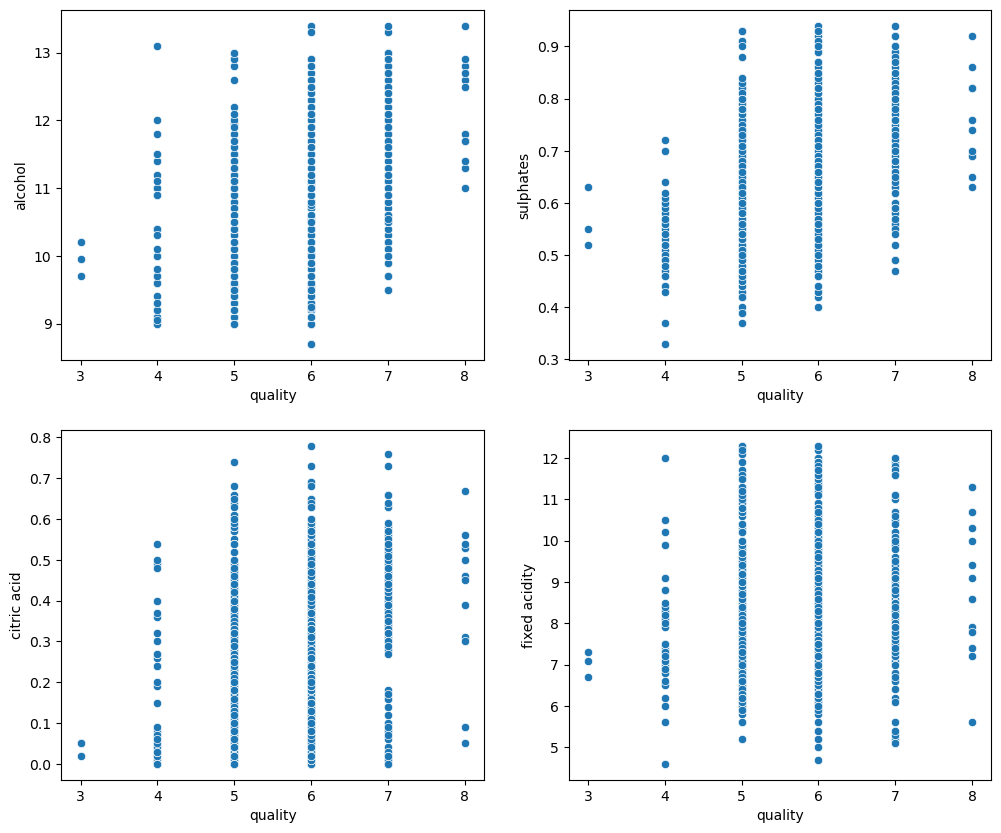

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(x='quality',y='alcohol',data = df)

plt.subplot(2,2,2)
sns.scatterplot(x='quality',y='sulphates',data = df)

plt.subplot(2,2,3)
sns.scatterplot(x='quality',y='citric acid',data = df)

plt.subplot(2,2,4)
sns.scatterplot(x='quality',y='fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

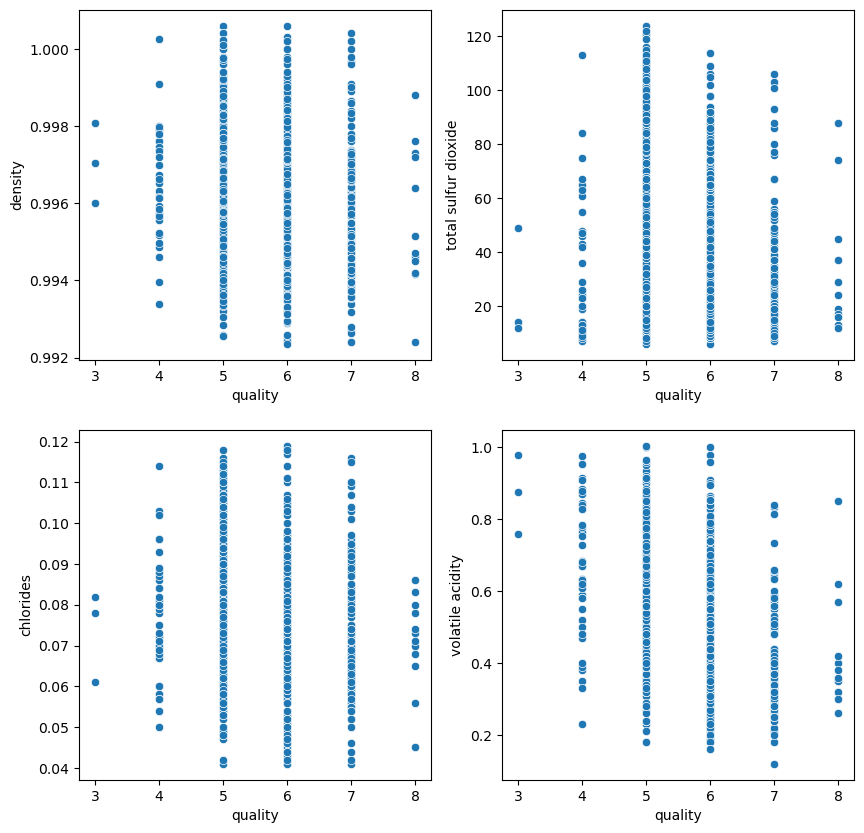

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x='quality',y='density',data = df)

plt.subplot(2,2,2)
sns.scatterplot(x='quality',y='total sulfur dioxide',data = df)

plt.subplot(2,2,3)
sns.scatterplot(x='quality',y='chlorides',data = df)

plt.subplot(2,2,4)
sns.scatterplot(x='quality',y='volatile acidity',data = df)

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

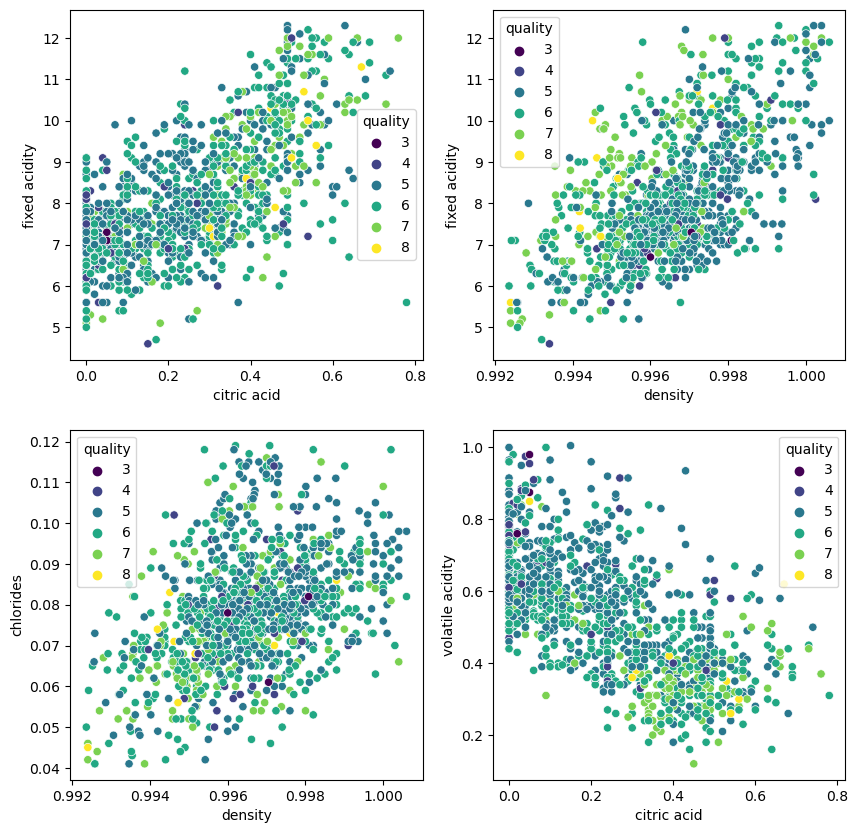

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x='citric acid',y='fixed acidity',hue = 'quality', palette="viridis", data = df)

plt.subplot(2,2,2)
sns.scatterplot(x='density',y='fixed acidity',hue ='quality', palette='viridis', data = df)

plt.subplot(2,2,3)
sns.scatterplot(x='density',y='chlorides',hue='quality',palette='viridis', data = df)

plt.subplot(2,2,4)
sns.scatterplot(x='citric acid',y='volatile acidity',hue='quality',palette='viridis',data = df)

In [13]:
x = df.drop('quality',axis = 1)
y = df['quality']
x_train,x_test,y_train,y_test = tt(x,y,random_state = 42)

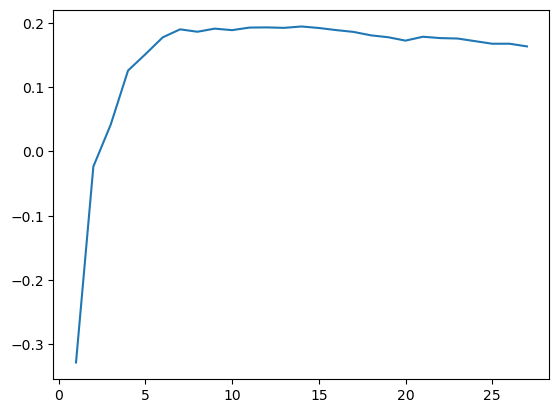

[-0.32857853283592425, -0.023513027283391552, 0.041768437165183456, 0.12602707916707095, 0.15141802691318723, 0.1776892051601247, 0.19016248498075095, 0.18641501323158868, 0.19125305908698895, 0.18891696041057085, 0.1929023194192103, 0.19318412791821493, 0.1924694737661368, 0.19462029056779856, 0.1922787535172144, 0.1889873571579695, 0.18617725001205226, 0.1808367745882777, 0.17785280570990253, 0.17259014817097232, 0.17864496519832487, 0.17653619556192732, 0.17585649638651765, 0.17180529254365973, 0.16773394554575022, 0.1677612465212464, 0.1636011007961256]


In [23]:
x_axis = []
y_axis = []
for i in range(1,28):
    k = knn(n_neighbors = i)
    score = cross_val_score(k,x_train,y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
    
plt.plot(x_axis,y_axis)
plt.show()
print(y_axis)

In [43]:
algo = {
    'Linear Regression' : lr(),
    'Decision Tree' : dt(),
    'Random Forest' : rf(),
    'K Nearest Neighbors' : knn(n_neighbors=9)
}

In [63]:
algo_score = []

for algo_name, al in algo.items():
    al.fit(x_train, y_train)
    y_pred = al.predict(x_test)
#     print(y_pred)
#     print()
    y_pred = np.round_(y_pred)
#     print(y_pred)
    score = r2_score(y_test,y_pred)
    algo_score.append((algo_name, score))
    
print(algo_score)

[('Linear Regression', 0.20023017283152966), ('Decision Tree', -0.32549265062187027), ('Random Forest', 0.16108060087223397), ('K Nearest Neighbors', -0.101780810854466)]
